In [2]:
import cv2
import everai
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

/home/filipgrigorov/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/filipgrigorov/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/filipgrigorov/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/filipgrigorov/anaconda3/envs/ml

In [9]:
data1 = '/home/filipgrigorov/Workspace/python_code/nets/spoof_detection/src/data/onyx/test/spoof_bent_paper_1/capture-rgb-0-135.316.png'
data2 = '/home/filipgrigorov/Workspace/python_code/nets/spoof_detection/src/data/onyx/test/spoof_euro_male_400_beard_hoodie_lights_off/capture-rgb-0-273426.574.png'
data3 = '/home/filipgrigorov/Workspace/python_code/nets/spoof_detection/src/data/onyx/test/real_male_light/capture-rgb-0-402.870.png'
data4 = '/home/filipgrigorov/Workspace/python_code/nets/spoof_detection/src/data/onyx/test/real_male_dark/capture-rgb-0-344.999.png'

In [10]:
rgb1 = cv2.cvtColor(cv2.imread(data1), cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(cv2.imread(data2), cv2.COLOR_BGR2RGB)
rgb3 = cv2.cvtColor(cv2.imread(data3), cv2.COLOR_BGR2RGB)
rgb4 = cv2.cvtColor(cv2.imread(data4), cv2.COLOR_BGR2RGB)

In [11]:
sess = everai.Session()





Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /home/filipgrigorov/anaconda3/envs/ml/lib/python3.7/site-packages/everai/models/graph/variables/variables


In [12]:
def find_faces(sess, rgb):
    faces, top_i = sess.detect_bounding_boxes(rgb)
    if top_i < 0:
        raise('Face is not good')
    face = faces[top_i]
    
    tl = face.bounding_box.top_left
    br = face.bounding_box.bottom_right
    
    # [tl.x, tl.y, br.x, br.y]
    roi = rgb[tl.y : br.y, tl.x : br.x, :]
    
    return roi

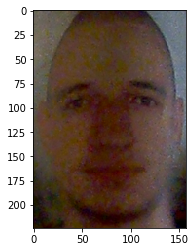

In [14]:
roi1 = find_faces(sess, rgb1)

plt.imshow(roi1)

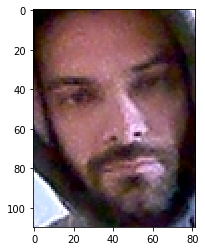

In [16]:
roi2 = find_faces(sess, rgb2)

plt.imshow(roi2)

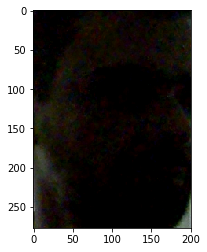

In [17]:
roi3 = find_faces(sess, rgb3)

plt.imshow(roi3)

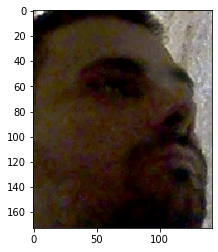

In [18]:
roi4 = find_faces(sess, rgb4)

plt.imshow(roi4)

In [56]:
hsv1 = cv2.cvtColor(roi1, cv2.COLOR_RGB2YCrCb)[:,:,1]
hsv2 = cv2.cvtColor(roi2, cv2.COLOR_RGB2YCrCb)[:,:,1]
hsv3 = cv2.cvtColor(roi3, cv2.COLOR_RGB2YCrCb)[:,:,1]
hsv4 = cv2.cvtColor(roi4, cv2.COLOR_RGB2YCrCb)[:,:,1]

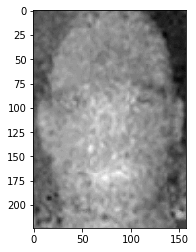

In [57]:
plt.imshow(hsv1, cmap='gray')

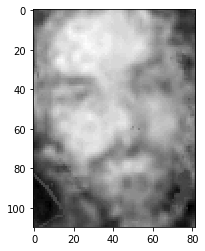

In [58]:
plt.imshow(hsv2, cmap='gray')

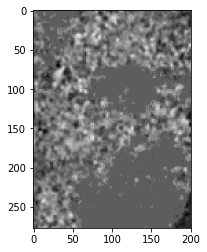

In [59]:
plt.imshow(hsv3, cmap='gray')

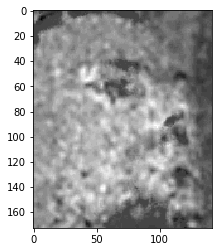

In [60]:
plt.imshow(hsv4, cmap='gray')